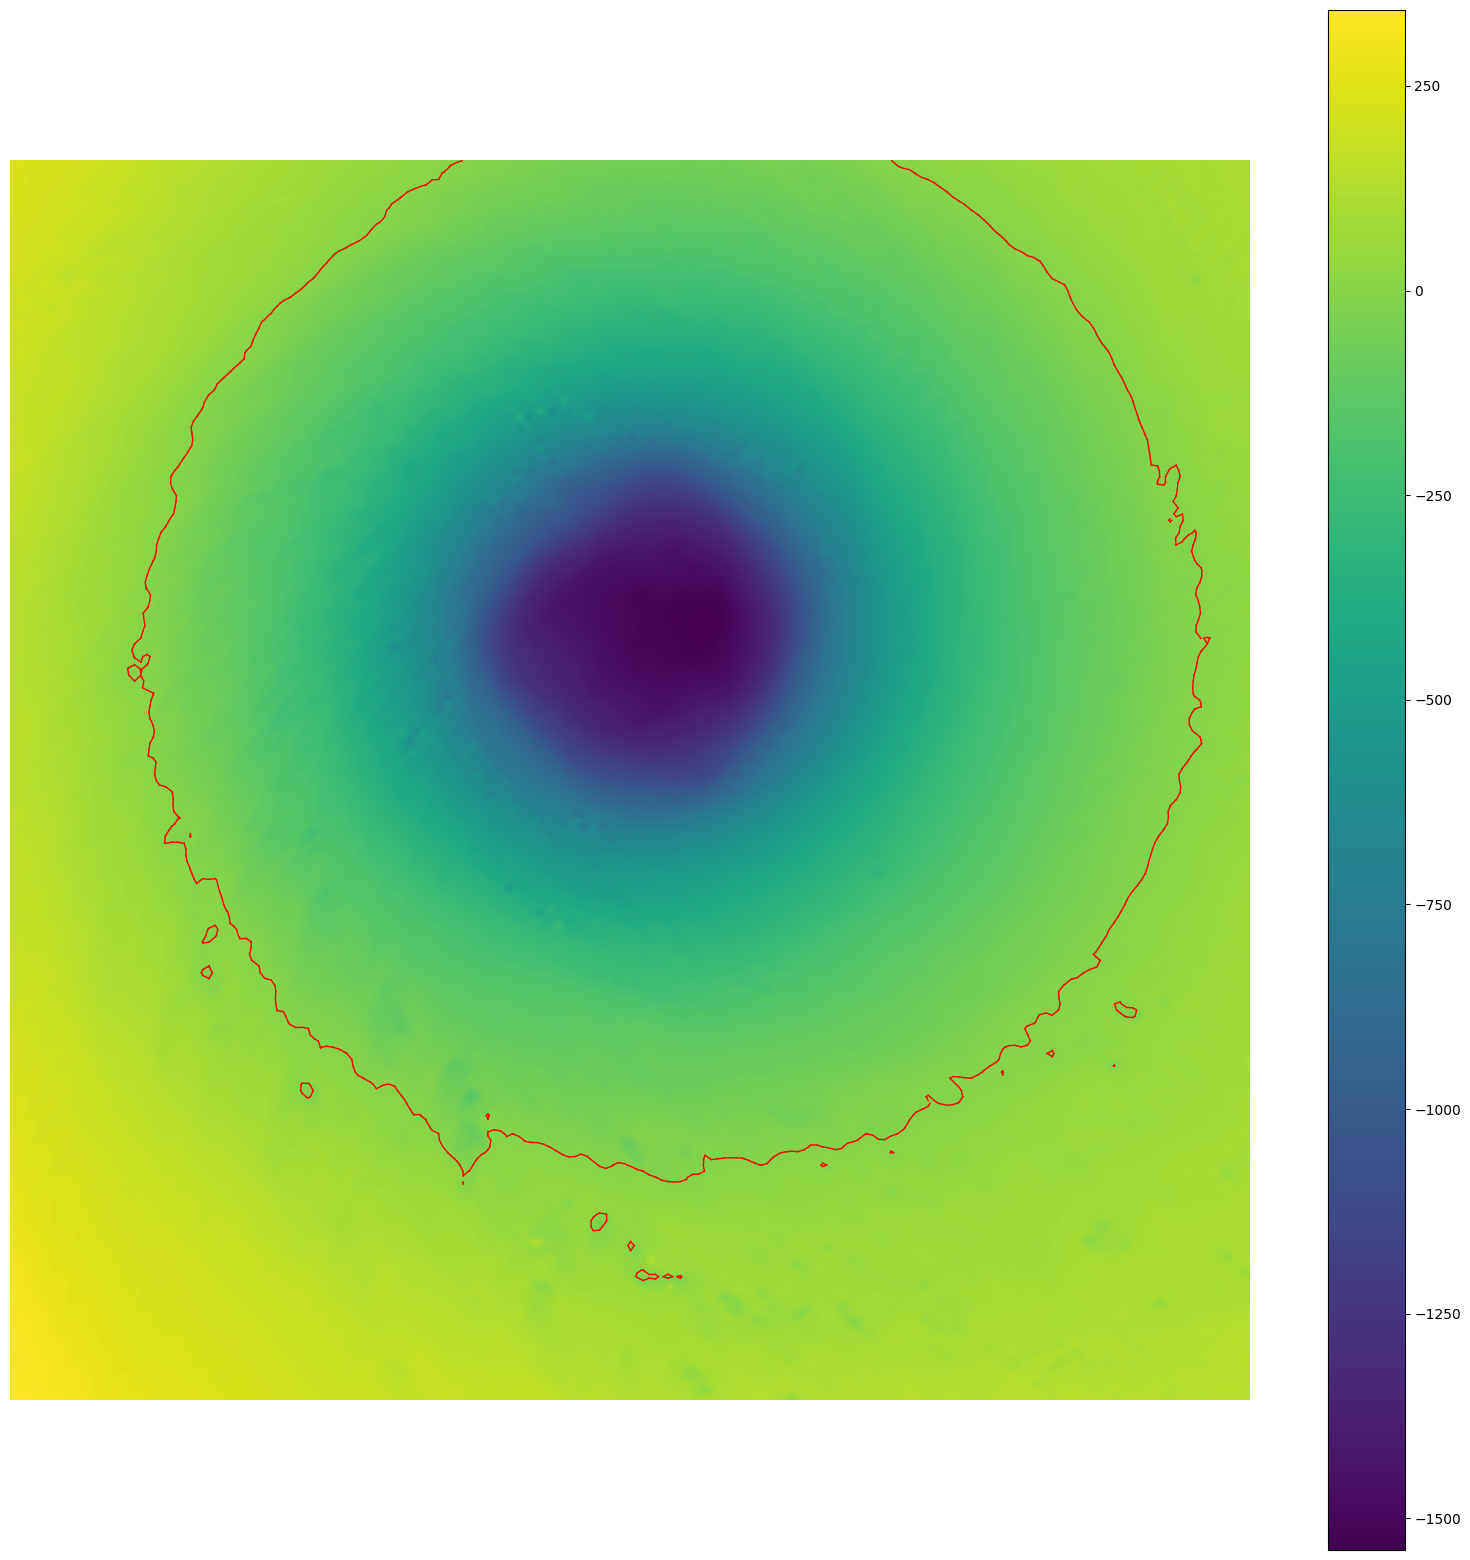

In [38]:
import numpy as np
import matplotlib.pyplot as plt

data2D = 0
data2DPlot = 0

# draw a line segment between [x0, y0] -> [x1, y1]. color: color of the line semgne
# DO NOT modify this function


def plotOneEdge(x0, y0, x1, y1, color="white"):
    #     plt.plot([y0*5,y1*5], [x0*5,x1*5], linewidth=1, color=color)
    plt.plot([x0*5, x1*5], [y0*5, y1*5], linewidth=1, color=color)

# x, y: location. Return: data value at [x,y]
# DO NOT modify this function


def getDataValue(x, y):
    return data2D[x, y]

# data loading and setup/plot image
# DO NOT modify this function


def Initialize():
    global data2D
    global data2DPlot
    data2D = np.load("rawData.npy").transpose()
    data2DPlot = np.load("plotData.npy")

    plt.rcParams['figure.figsize'] = [20, 20]
    plt.axis('off')
    plt.imshow(data2DPlot)
    plt.colorbar()

# (TODO) WORK on this function
# compute and draw the isocontour of the given datavalue ("isovalue")
# color: isocontour color
# you should use "getDataVlue()" to get the data you want and use "plotOneEdge()" to a segment of the isocontour
# I do not mind the computation is efficnet or not


def computePlotIsoContour(isovalue, color):
    for y in range(0, 199):
        for x in range(0, 199):
            top_left = getDataValue(x, y)
            top_right = getDataValue(x + 1, y)
            bottom_left = getDataValue(x, y + 1)
            bottom_right = getDataValue(x + 1, y + 1)

            diffs = [top_left - isovalue, top_right - isovalue,
                     bottom_right - isovalue, bottom_left - isovalue]

            if sum([1 if diff > 0 else 0 for diff in diffs]) == 0:
                continue
            if sum([1 if diff < 0 else 0 for diff in diffs]) == 0:
                continue

            x0, y0, x1, y1 = 0, 0, 0, 0

            if diffs[0] * diffs[1] < 0:
                x0 = x + abs(diffs[0] / (diffs[1] - diffs[0]))
                y0 = y
                if diffs[1] * diffs[2] < 0:
                    x1 = x + 1
                    y1 = y + abs(diffs[1] / (diffs[2] - diffs[1]))
                elif diffs[2] * diffs[3] < 0:
                    x1 = x + abs(diffs[3] / (diffs[2] - diffs[3]))
                    y1 = y + 1
                elif diffs[3] * diffs[0] < 0:
                    x1 = x
                    y1 = y + abs(diffs[0] / (diffs[3] - diffs[0]))
            elif diffs[1] * diffs[2] < 0:
                x0 = x + 1
                y0 = y + abs(diffs[1] / (diffs[2] - diffs[1]))
                if diffs[2] * diffs[3] < 0:
                    x1 = x + abs(diffs[3] / (diffs[2] - diffs[3]))
                    y1 = y + 1
                elif diffs[3] * diffs[0] < 0:
                    x1 = x
                    y1 = y + abs(diffs[0] / (diffs[3] - diffs[0]))
            elif diffs[2] * diffs[3] < 0:
                x0 = x + abs(diffs[3] / (diffs[2] - diffs[3]))
                y0 = y + 1
                if diffs[3] * diffs[0] < 0:
                    x1 = x
                    y1 = y + abs(diffs[0] / (diffs[3] - diffs[0]))

            plotOneEdge(x0, y0, x1, y1, color)


# main
Initialize()

# You can modify this function call to test your program on different isovalues
computePlotIsoContour(0, "red")

plt.show()
